In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/consumption (1).csv')

In [ ]:
df.head()

,Date,Lamp,Mobile,Laptop,Total KWh
0,08-10-2021,0.05,0.03,0.48,0.56
1,09-10-2021,0.02,0.03,0.36,0.41
2,10-10-2021,0.04,0.03,0.30,0.37
3,11-10-2021,0.08,0.02,0.42,0.52
4,12-10-2021,0.02,0.02,0.24,0.28


In [ ]:
df.describe()

,Lamp,Mobile,Laptop,Total KWh
count,58.000000,58.000000,58.000000,58.00000
mean,0.054828,0.028966,0.406897,0.49069
std,0.028423,0.025867,0.127406,0.13018
min,0.010000,0.010000,0.120000,0.21000
25%,0.030000,0.020000,0.300000,0.39500
50%,0.050000,0.020000,0.405000,0.48000
75%,0.070000,0.040000,0.480000,0.55000
max,0.120000,0.200000,0.720000,0.89000


In [ ]:
df.shape

(58, 5)

In [ ]:
data = [df["Date"],df["Total KWh"]]
headers = ["Date","Units"]
df1 = pd.concat(data,axis=1,keys=headers)

In [ ]:
df1.head()

,Date,Units
0,08-10-2021,0.56
1,09-10-2021,0.41
2,10-10-2021,0.37
3,11-10-2021,0.52
4,12-10-2021,0.28


In [ ]:
df1.tail()

,Date,Units
53,30-11-2021,0.52
54,01-12-2021,0.54
55,02-12-2021,0.21
56,03-12-2021,0.63
57,04-12-2021,0.56


In [ ]:
df1.describe()

,Units
count,58.00000
mean,0.49069
std,0.13018
min,0.21000
25%,0.39500
50%,0.48000
75%,0.55000
max,0.89000


In [ ]:
import seaborn as sns

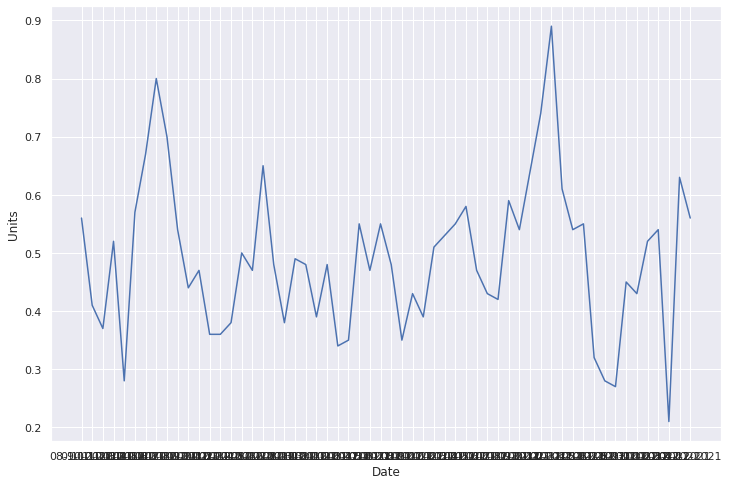

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x='Date',y='Units',data=df1)
plt.show()

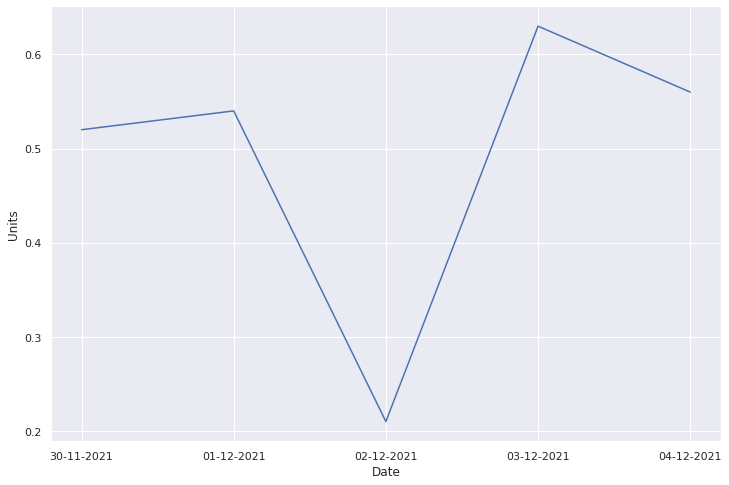

In [ ]:
#Last 5 days
last_5_days = df1.tail()
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x='Date',y='Units',data=last_5_days)
plt.show()


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date']) # to_datetime function

In [ ]:
df1.head()

,Date,Units
0,2021-08-10,0.56
1,2021-09-10,0.41
2,2021-10-10,0.37
3,2021-11-10,0.52
4,2021-12-10,0.28


In [ ]:
import datetime as dt
from sklearn.model_selection import train_test_split

In [ ]:
# Converting the date to ordinal values for ease of computation
df1['Date'] = df1['Date'].map(dt.datetime.toordinal)
df1.head()

,Date,Units
0,738012,0.56
1,738043,0.41
2,738073,0.37
3,738104,0.52
4,738134,0.28


In [ ]:
X = df1['Date']
y = df1['Units']

# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



#Testing this data with various algorithms

In [ ]:
#1 Linear Regression
from sklearn.linear_model import LinearRegression


In [ ]:
x1_train = np.array(X_train).reshape(-1,1)
y1_train = np.array(y_train).reshape(-1,1)

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(x1_train,y1_train)

LinearRegression()

In [ ]:
x1_test = np.array(X_test).reshape(-1,1)

y_pred = model1.predict(x1_test)

In [ ]:
y_pred

array([[0.50155031],
       [0.50112933],
       [0.49723525],
       [0.49776147],
       [0.50070834],
       [0.49702476],
       [0.48386908],
       [0.48702645],
       [0.46797703],
       [0.49660377],
       [0.49986638],
       [0.49849819]])

In [ ]:
y_test

4     0.28
38    0.43
33    0.51
24    0.34
8     0.70
15    0.50
48    0.32
28    0.55
11    0.47
12    0.36
34    0.53
21    0.48
Name: Units, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.025408317904340172

In [ ]:
import joblib


In [ ]:
joblib.dump(model1,'linear_model.pkl')

['linear_model.pkl']

In [ ]:
# Applying ridge regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(x1_train,y1_train);

In [ ]:
y_pred = rr.predict(x1_test)

In [ ]:
y_pred

array([[0.50155031],
       [0.50112933],
       [0.49723525],
       [0.49776147],
       [0.50070834],
       [0.49702476],
       [0.48386909],
       [0.48702645],
       [0.46797703],
       [0.49660377],
       [0.49986638],
       [0.49849819]])

In [ ]:
r2_score(y_test,y_pred)

0.025408316892984173

In [ ]:
joblib.dump(rr,'ridge_model.pkl')

['ridge_model.pkl']